# **Assigment 1**

## **Challenge 1**

Problems:
1.   Load the data into memory. What are the sampling rate and duration of the data?
2.   Plot the data in the time-domain.
3.   Plot a spectrogram (or q-transform) of the data, and try to identify the signal.
4.   What is the time of the merger?

Solutions:
1.   The sample rate of the data is: 4096.0 Hz, and the duration of the data is: 128.0 s.
2.   See the code and its result for the plot.
3.   The signal goes from around 11s to around 17s, which is in GPS time, from around 11-13=-2s to around 17-13=4s.
4.   The merger seems to have happened at 65.7s or in gps time at 1.7s.



### Code for problem 1

Installing pycbc module.

In [1]:
# This installs the pycbc module to be used
! pip install -q 'lalsuite==6.82' 'PyCBC==1.18.0' 

Importing the datafile.

In [2]:
from pycbc.frame import read_frame
import urllib.request

# Function to retrieve the data files
def get_file(fname):
    url = "https://www.gw-openscience.org/s/workshop3/challenge/{}"
    url = url.format(fname) #this finishes the url link to be the link to the file that is wanted
    urllib.request.urlretrieve(url, fname) #this retrieves the file
    print('Getting : {}'.format(url))

# Add here which files you want to get
files = ['challenge1.gwf']

# This will get the files you entered above
for fname in files: 
    get_file(fname)
    
file_name = "challenge1.gwf"
channel_name = "H1:CHALLENGE1"

ts = read_frame(file_name, channel_name)

Getting : https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf


Getting the asked information from the data file.

In [3]:
s_rate = ts.sample_rate
dur = ts.duration
print("The sample rate of the data is: {0} Hz, and the duration of the data is: {1} s.".format(s_rate, dur))

The sample rate of the data is: 4096.0 Hz, and the duration of the data is: 128.0 s.


### Code for problem 2

Installing gwpy module and importing matplotlib.

In [4]:
! pip install -q 'gwpy==2.0.2'
import matplotlib.pyplot as plt

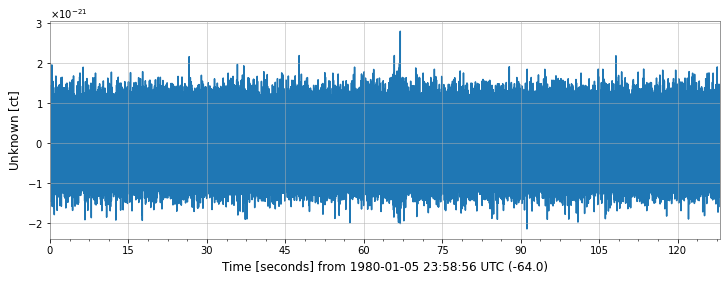

In [7]:
from gwpy.timeseries import TimeSeries
data = TimeSeries.read("challenge1.gwf", channel="H1:CHALLENGE1") #reading the data file and turning it into a timeseries
%matplotlib inline
plot = data.plot() #plotting the timeseries

### Code for problem 3

Below, the code and its result (a spectrogram) can be seen.

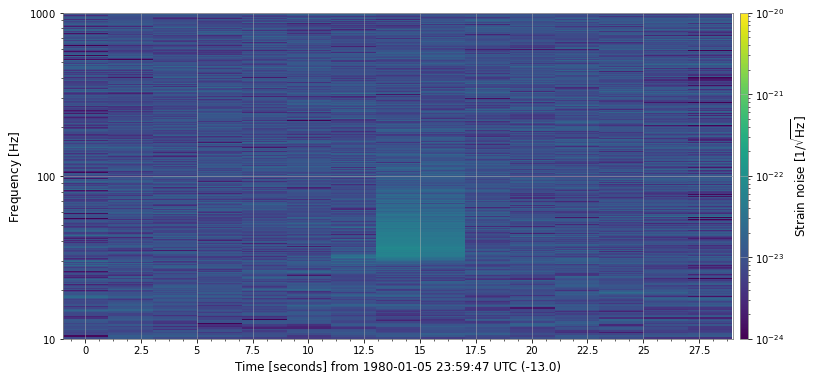

In [30]:
data_SE = TimeSeries.read("challenge1.gwf", channel="H1:CHALLENGE1", start=ts.start_time+50, end=ts.start_time+80) #data_SE = data with Start en End time
specgram = data_SE.spectrogram2(fftlength=4, overlap=2, window='hann') ** (1/2.) #creating the spectrogram object from the data
plot = specgram.plot()
#adjusting the axes and colorbar
ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(10, 1000)
ax.colorbar(
    clim=(1e-24, 1e-20),
    norm="log",
    label=r"Strain noise [$1/\sqrt{\mathrm{Hz}}$]")

### Code for problem 4

Now, let's do a q-transform.

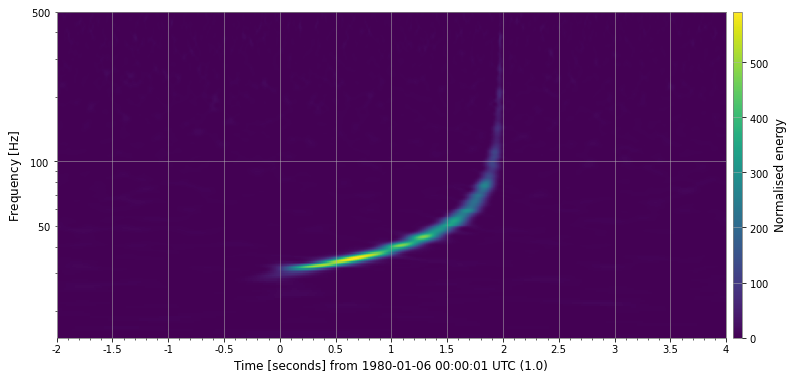

In [47]:
hq = data_SE.q_transform(frange=(15, 500), qrange=(10,110), outseg=(-1,5))
plot = hq.plot()
ax = plot.gca()
ax.set_epoch(ts.start_time+65)
ax.set_yscale("log")
ax.colorbar(label="Normalised energy")